In [1]:
# Import our dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
# Import our input dataset
# Changed dataset in Segment 2 of Final Project
airbnb_db_df = pd.read_csv("Resources/listings.csv")
airbnb_db_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.020000e+13,10/14/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,2.020000e+13,10/14/2019,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,2.020000e+13,10/14/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,7918,https://www.airbnb.com/rooms/7918,2.020000e+13,10/14/2019,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8142,https://www.airbnb.com/rooms/8142,2.020000e+13,10/14/2019,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


### Clean Dataset

In [3]:
# determine which columns don't contain data
airbnb_db_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.111000e+03,8.111000e+03,0.0,0.0,0.0,8.111000e+03,0.0,8103.000000,8103.000000,0.0,...,6457.000000,6456.000000,6458.000000,6456.000000,6456.000000,8111.000000,8111.000000,8111.000000,8111.000000,6506.000000
mean,2.024561e+07,2.020000e+13,NaN,NaN,NaN,6.159690e+07,NaN,90.421079,90.421079,NaN,...,9.603686,9.847584,9.817745,9.682776,9.375155,22.329799,18.201085,2.910985,0.496979,1.873298
std,1.228565e+07,0.000000e+00,NaN,NaN,NaN,8.017417e+07,NaN,324.526784,324.526784,NaN,...,0.839768,0.593539,0.659274,0.715906,0.879174,54.369225,53.333669,6.807334,2.669129,2.096730
min,9.580000e+02,2.020000e+13,NaN,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,8.905668e+06,2.020000e+13,NaN,NaN,NaN,4.386571e+06,NaN,1.000000,1.000000,NaN,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.300000
50%,2.161057e+07,2.020000e+13,NaN,NaN,NaN,2.178983e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.010000
75%,3.120025e+07,2.020000e+13,NaN,NaN,NaN,1.000763e+08,NaN,12.000000,12.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,0.000000,2.840000
max,3.935418e+07,2.020000e+13,NaN,NaN,NaN,3.016759e+08,NaN,1735.000000,1735.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,248.000000,248.000000,39.000000,26.000000,21.190000


In [4]:
# clean data for database
# drop columns that don't contain data
airbnb_db_df = airbnb_db_df.drop(["thumbnail_url", "medium_url", "xl_picture_url", "host_acceptance_rate",
                                 "neighbourhood_group_cleansed"], axis=1)

In [5]:
airbnb_db_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.020000e+13,10/14/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,2.020000e+13,10/14/2019,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,2.020000e+13,10/14/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,7918,https://www.airbnb.com/rooms/7918,2.020000e+13,10/14/2019,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8142,https://www.airbnb.com/rooms/8142,2.020000e+13,10/14/2019,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


In [6]:
# Drop irrelevant columns, and columns we've decided not to include in the analysis
# Segment2_3_EDA branch - include zipcode, minimum_nights, maximum_nights, review_scores_rating 
airbnb_db_df = airbnb_db_df.drop(["listing_url", "scrape_id", "last_scraped", "name", "summary",
                                 "space", "description", "experiences_offered", "neighborhood_overview",
                                 "notes", "transit", "access", "interaction", "house_rules", "picture_url",
                                 "host_url", "host_name", "host_since", "host_location", "host_about", 
                                 "host_response_time", "host_response_rate", "host_thumbnail_url", 
                                 "host_picture_url", "host_neighbourhood", "host_listings_count", 
                                 "host_total_listings_count", "host_verifications", "host_has_profile_pic",
                                 "host_identity_verified", "street", "neighbourhood", "market", "smart_location", 
                                 "country_code", "is_location_exact", "beds", "bed_type", "amenities", "square_feet",
                                 "weekly_price", "monthly_price", "security_deposit", "guests_included", "extra_people", 
                                 "minimum_minimum_nights", "maximum_minimum_nights",
                                 "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", 
                                 "maximum_nights_avg_ntm", "calendar_updated", "has_availability", "availability_30", 
                                 "availability_60", "availability_90", "availability_365", "calendar_last_scraped", 
                                 "number_of_reviews_ltm", "first_review", "last_review", 
                                 "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", 
                                 "review_scores_communication", "review_scores_location", "review_scores_value", 
                                 "requires_license", "license", "jurisdiction_names", "instant_bookable", 
                                 "is_business_travel_ready", "cancellation_policy", "require_guest_profile_picture", 
                                 "require_guest_phone_verification", "calculated_host_listings_count", 
                                 "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", 
                                 "calculated_host_listings_count_shared_rooms", "reviews_per_month"], axis=1)
airbnb_db_df.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,...,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,958,1169,t,Western Addition,San Francisco,CA,94117,United States,37.76931,-122.43386,...,Entire home/apt,3,1.0,1.0,$170.00,$100.00,1,30,217,97.0
1,3850,4921,t,Inner Sunset,San Francisco,CA,94131,United States,37.75402,-122.45805,...,Private room,2,1.0,1.0,$99.00,$10.00,1,5,160,94.0
2,5858,8904,f,Bernal Heights,San Francisco,CA,94110,United States,37.74511,-122.42102,...,Entire home/apt,5,1.0,2.0,$235.00,$100.00,30,60,111,98.0
3,7918,21994,t,Haight Ashbury,San Francisco,CA,94117,United States,37.76669,-122.45250,...,Private room,2,4.0,1.0,$65.00,$50.00,32,60,18,86.0
4,8142,21994,t,Haight Ashbury,San Francisco,CA,94117,United States,37.76487,-122.45183,...,Private room,2,4.0,1.0,$65.00,$50.00,32,90,8,93.0


In [7]:
print(airbnb_db_df.shape)

(8111, 21)


In [8]:
# Determine the data types of each column.
airbnb_db_df.dtypes

id                          int64
host_id                     int64
host_is_superhost          object
neighbourhood_cleansed     object
city                       object
state                      object
zipcode                    object
country                    object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
price                      object
cleaning_fee               object
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [9]:
# # Determine the number of unique values in each column.
airbnb_db_df.nunique()

id                        8111
host_id                   4303
host_is_superhost            2
neighbourhood_cleansed      37
city                         8
state                        2
zipcode                     44
country                      1
latitude                  5059
longitude                 5179
property_type               26
room_type                    4
accommodates                16
bathrooms                   17
bedrooms                    10
price                      526
cleaning_fee               188
minimum_nights              53
maximum_nights             156
number_of_reviews          410
review_scores_rating        44
dtype: int64

In [10]:
# determine if there are any missing values in the columns
# DECIDE WHAT TO DO WITH THE NULL VALUES
airbnb_db_df.isnull().sum()

id                           0
host_id                      0
host_is_superhost            8
neighbourhood_cleansed       0
city                        10
state                        7
zipcode                    245
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   12
bedrooms                     4
price                        0
cleaning_fee               924
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      1651
dtype: int64

In [11]:
print(airbnb_db_df.shape)

(8111, 21)


In [12]:
# handle host_is_superhost null values
airbnb_db_df.loc[(airbnb_db_df["host_is_superhost"] != "t") & (airbnb_db_df["host_is_superhost"] != "f")]

,id,host_id,host_is_superhost,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,...,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
121,114401,580606,NaN,Castro/Upper Market,San Francisco,CA,94114,United States,37.76102,-122.43005,...,Private room,1,1.0,1.0,$125.00,$0.00,1,1125,569,97.0
3466,18639196,128943312,NaN,Inner Sunset,San Francisco,CA,94116,United States,37.75030,-122.47425,...,Private room,1,1.0,1.0,$68.00,$41.00,1,10,161,98.0
3489,18765944,128943312,NaN,Parkside,San Francisco,CA,94116,United States,37.74816,-122.47393,...,Private room,1,1.0,1.0,$76.00,$41.00,1,10,155,98.0
3490,18767723,128943312,NaN,Parkside,San Francisco,CA,94116,United States,37.74866,-122.47544,...,Private room,2,1.0,1.0,$85.00,$42.00,1,10,162,99.0
3497,18785944,128943312,NaN,Inner Sunset,San Francisco,CA,94116,United States,37.75004,-122.47391,...,Private room,2,1.0,1.0,$95.00,$42.00,1,10,142,98.0
5422,28363414,151607879,NaN,Outer Mission,San Francisco,CA,94112,United States,37.71975,-122.44273,...,Private room,2,1.0,1.0,$90.00,$36.00,1,14,48,95.0
7029,34867880,262874420,NaN,Outer Sunset,San Francisco,CA,94122,United States,37.76258,-122.49234,...,Private room,4,1.0,2.0,$109.00,$50.00,2,18,22,95.0
7199,35580847,267698035,NaN,South of Market,San Francisco,CA,94103,United States,37.77266,-122.40859,...,Entire home/apt,6,2.0,2.0,$345.00,$100.00,1,1125,8,88.0


In [13]:
# drop rows with host_is_superhost as null (8 rows)
airbnb_db_df = airbnb_db_df.dropna(subset=["host_is_superhost"])
print(airbnb_db_df.shape)

(8103, 21)


In [14]:
# handle city null values
airbnb_db_df.city.value_counts()

San Francisco                  8051
Daly City                        34
San Francisco                     3
San Jose                          1
旧金山                               1
Noe Valley - San Francisco        1
Brisbane                          1
San Francisco, Hayes Valley       1
Name: city, dtype: int64

In [15]:
airbnb_db_df["city"].replace({"San Francisco, Hayes Valley": "San Francisco", 
                              "Noe Valley - San Francisco": "San Francisco",
                              "San Francisco ": "San Francisco"}, inplace=True)

In [16]:
airbnb_db_df.city.value_counts()

San Francisco    8056
Daly City          34
San Jose            1
旧金山                 1
Brisbane            1
Name: city, dtype: int64

In [17]:
# drop rows with city != San Francisco (37 rows) (this includes null values of 10 rows)
airbnb_db_df.drop(airbnb_db_df[airbnb_db_df["city"] != "San Francisco"].index, inplace = True)
print(airbnb_db_df.shape)

(8056, 21)


In [18]:
# handle state null values
airbnb_db_df.state.value_counts()

CA    8047
Ca       3
Name: state, dtype: int64

In [19]:
airbnb_db_df["state"].replace({"Ca": "CA"}, inplace=True)
airbnb_db_df.state.value_counts()

CA    8050
Name: state, dtype: int64

In [20]:
# drop rows with state as null (6 rows)
airbnb_db_df = airbnb_db_df.dropna(subset=["state"])
print(airbnb_db_df.shape)

(8050, 21)


In [21]:
airbnb_db_df.isnull().sum()

id                           0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
city                         0
state                        0
zipcode                    234
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   12
bedrooms                     4
price                        0
cleaning_fee               920
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      1636
dtype: int64

In [22]:
# clean zipcode column
airbnb_db_df["zipcode"] = airbnb_db_df["zipcode"].replace({"CA ": "", "CA": ""}, regex=True)
print(airbnb_db_df.shape)

(8050, 21)


In [23]:
# drop zipcode row with "" value
airbnb_db_df.drop(airbnb_db_df[airbnb_db_df["zipcode"] == ""].index, inplace = True)

In [24]:
# handle zipcode null values (234 rows) - drop
airbnb_db_df = airbnb_db_df.dropna(subset=["zipcode"])
print(airbnb_db_df.shape)

(7815, 21)


In [25]:
airbnb_db_df.isnull().sum()

id                           0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
city                         0
state                        0
zipcode                      0
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   12
bedrooms                     4
price                        0
cleaning_fee               919
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      1516
dtype: int64

In [26]:
airbnb_db_df.country.value_counts()

United States    7815
Name: country, dtype: int64

In [27]:
#airbnb_db_df[airbnb_db_df["id"] == 10500754]
#airbnb_db_df.loc[(airbnb_db_df["id"] == 10500754)].city

In [28]:
# drop city, state, country - all data points should already be only SF, CA USA
airbnb_db_df = airbnb_db_df.drop(["city", "state", "country"], axis=1)
airbnb_db_df.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,958,1169,t,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,$170.00,$100.00,1,30,217,97.0
1,3850,4921,t,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,$99.00,$10.00,1,5,160,94.0
2,5858,8904,f,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,$235.00,$100.00,30,60,111,98.0
3,7918,21994,t,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,$65.00,$50.00,32,60,18,86.0
4,8142,21994,t,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,$65.00,$50.00,32,90,8,93.0


In [29]:
print(airbnb_db_df.shape)

(7815, 18)


In [30]:
# handle bathrooms, bedrooms null values - replace with 0
airbnb_db_df["bathrooms"] = airbnb_db_df["bathrooms"].fillna(0)
airbnb_db_df["bedrooms"] = airbnb_db_df["bedrooms"].fillna(0)
airbnb_db_df.isnull().sum()

id                           0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
zipcode                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
price                        0
cleaning_fee               919
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      1516
dtype: int64

In [31]:
# to handle cleaning_fee null values, inlcude data type conversrion of price & cleaning_fee from string to float
# are all the values in price column objects?
airbnb_db_df["price"].apply(type).value_counts()

<class 'str'>    7815
Name: price, dtype: int64

In [32]:
# remove "$", " ", and "," from price column
#airbnb_db_df["price"] = airbnb_db_df["price"].str.replace("$", "")
#airbnb_db_df["price"] = airbnb_db_df["price"].str.replace(" ", "")
#airbnb_db_df["price"] = airbnb_db_df["price"].str.replace(",", "")

# convert price to float
#airbnb_db_df["price"] = airbnb_db_df["price"].astype(float, errors = "raise")

# remove "$", " ", and "," from price column and convert to float
airbnb_db_df["price"] = airbnb_db_df["price"].replace({"\$": "", " ": "", ",": ""}, regex=True).astype(float)

In [33]:
airbnb_db_df["price"].apply(type).value_counts()

<class 'float'>    7815
Name: price, dtype: int64

In [34]:
# are all the values in cleaning_fee column objects?
airbnb_db_df["cleaning_fee"].apply(type).value_counts()

<class 'str'>      6896
<class 'float'>     919
Name: cleaning_fee, dtype: int64

In [35]:
# remove "$", " ", and "," from cleaing_fee column and convert to float
airbnb_db_df["cleaning_fee"] = airbnb_db_df["cleaning_fee"].replace({"\$": "", " ": "", ",": ""}, regex=True).astype(float)

In [36]:
airbnb_db_df["cleaning_fee"].apply(type).value_counts()

<class 'float'>    7815
Name: cleaning_fee, dtype: int64

In [37]:
# replace cleaning_fee null values with zero
airbnb_db_df["cleaning_fee"] = airbnb_db_df["cleaning_fee"].fillna(0)

In [38]:
airbnb_db_df.isnull().sum()

id                           0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
zipcode                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
price                        0
cleaning_fee                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      1516
dtype: int64

In [39]:
# handle review_score_ratings - replace with zero
airbnb_db_df["review_scores_rating"] = airbnb_db_df["review_scores_rating"].fillna(0)

In [40]:
airbnb_db_df.isnull().sum()

id                        0
host_id                   0
host_is_superhost         0
neighbourhood_cleansed    0
zipcode                   0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
price                     0
cleaning_fee              0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [41]:
# create a total column that adds price + cleaning_fee
airbnb_db_df["total"] = airbnb_db_df.apply(lambda x: x["price"] + x["cleaning_fee"], axis = 1)

In [42]:
airbnb_db_df.isnull().sum()

id                        0
host_id                   0
host_is_superhost         0
neighbourhood_cleansed    0
zipcode                   0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
price                     0
cleaning_fee              0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
total                     0
dtype: int64

In [43]:
airbnb_db_df.dtypes

id                          int64
host_id                     int64
host_is_superhost          object
neighbourhood_cleansed     object
zipcode                    object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
price                     float64
cleaning_fee              float64
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
review_scores_rating      float64
total                     float64
dtype: object

In [44]:
airbnb_db_df.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,total
0,958,1169,t,Western Addition,94117,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,170.0,100.0,1,30,217,97.0,270.0
1,3850,4921,t,Inner Sunset,94131,37.75402,-122.45805,House,Private room,2,1.0,1.0,99.0,10.0,1,5,160,94.0,109.0
2,5858,8904,f,Bernal Heights,94110,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,235.0,100.0,30,60,111,98.0,335.0
3,7918,21994,t,Haight Ashbury,94117,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,65.0,50.0,32,60,18,86.0,115.0
4,8142,21994,t,Haight Ashbury,94117,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,65.0,50.0,32,90,8,93.0,115.0


In [45]:
print(airbnb_db_df.shape)

(7815, 19)


In [46]:
# reorder columns
airbnb_db_df = airbnb_db_df[["id", "host_id", "host_is_superhost", "property_type", "room_type", 
                             "neighbourhood_cleansed", "zipcode", "accommodates", "bedrooms", "bathrooms",
                             "minimum_nights", "maximum_nights", "latitude", "longitude", "number_of_reviews", 
                             "review_scores_rating", "price", "cleaning_fee", "total"]]

In [47]:
airbnb_db_df.head()

,id,host_id,host_is_superhost,property_type,room_type,neighbourhood_cleansed,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,latitude,longitude,number_of_reviews,review_scores_rating,price,cleaning_fee,total
0,958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,30,37.76931,-122.43386,217,97.0,170.0,100.0,270.0
1,3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,5,37.75402,-122.45805,160,94.0,99.0,10.0,109.0
2,5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,60,37.74511,-122.42102,111,98.0,235.0,100.0,335.0
3,7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,60,37.76669,-122.45250,18,86.0,65.0,50.0,115.0
4,8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,90,37.76487,-122.45183,8,93.0,65.0,50.0,115.0


In [48]:
# rename columns as necessary
airbnb_db_df = airbnb_db_df.rename(columns={"id": "room_id", "neighbourhood_cleansed": "neighborhood", "number_of_reviews": "reviews"}, errors="raise")

In [49]:
airbnb_db_df.dtypes

room_id                   int64
host_id                   int64
host_is_superhost        object
property_type            object
room_type                object
neighborhood             object
zipcode                  object
accommodates              int64
bedrooms                float64
bathrooms               float64
minimum_nights            int64
maximum_nights            int64
latitude                float64
longitude               float64
reviews                   int64
review_scores_rating    float64
price                   float64
cleaning_fee            float64
total                   float64
dtype: object

In [50]:
# save cleaned dataframe for database
airbnb_db_df.to_csv("Resources/cleaned_airbnb_dataset2.csv", index=False)

### EDA

In [61]:
# get the number of properties in each neighborhood and create a dataframe
neighborhood_count_df = pd.DataFrame(airbnb_db_df.groupby(["neighborhood"]).count()["room_id"])
neighborhood_count_df

,room_id
neighborhood,
Bayview,202
Bernal Heights,387
Castro/Upper Market,424
Chinatown,112
Crocker Amazon,39
Diamond Heights,17
Downtown/Civic Center,660
Excelsior,179
Financial District,170


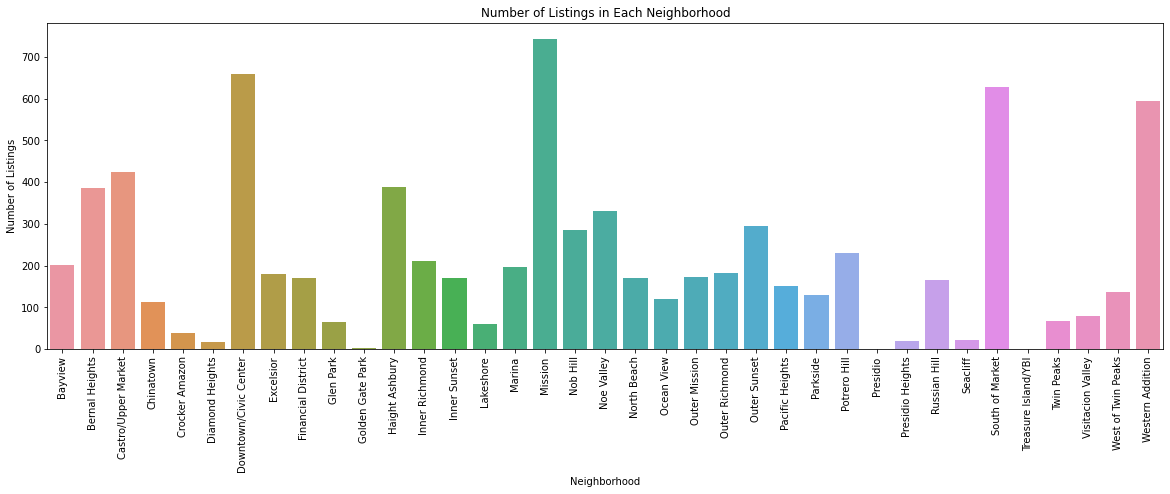

In [62]:
plt.figure(figsize=(20, 6))
sns.barplot(neighborhood_count_df.index, neighborhood_count_df["room_id"])
# neighborhood_count_df.plot.bar(figsize=(20,6))
plt.title("Number of Listings in Each Neighborhood")
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")

plt.show()

In [63]:
# get the number of property types and create a dataframe
property_type_count_df = pd.DataFrame(airbnb_db_df.groupby(["property_type"]).count()["room_id"])
property_type_count_df

,room_id
property_type,
Aparthotel,41
Apartment,3049
Bed and breakfast,42
Boutique hotel,267
Bungalow,17
Cabin,3
Camper/RV,1
Castle,4
Condominium,853


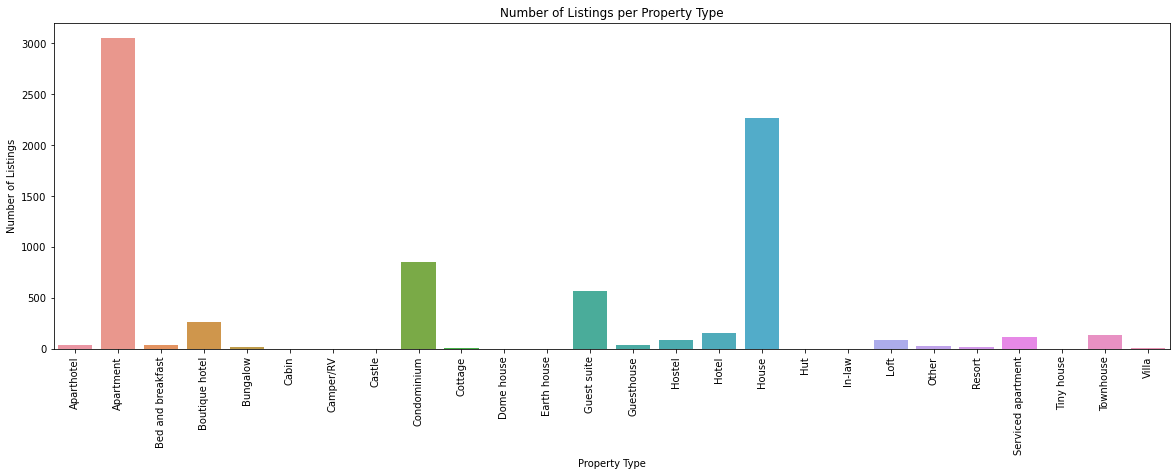

In [66]:
plt.figure(figsize=(20, 6))
sns.barplot(property_type_count_df.index, property_type_count_df["room_id"])
plt.title("Number of Listings per Property Type")
plt.xticks(rotation=90)
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")

plt.show()

In [65]:
# get the number of room types and create a dataframe
room_type_count_df = pd.DataFrame(airbnb_db_df.groupby(["room_type"]).count()["room_id"])
room_type_count_df

,room_id
room_type,
Entire home/apt,4516
Hotel room,202
Private room,2857
Shared room,240


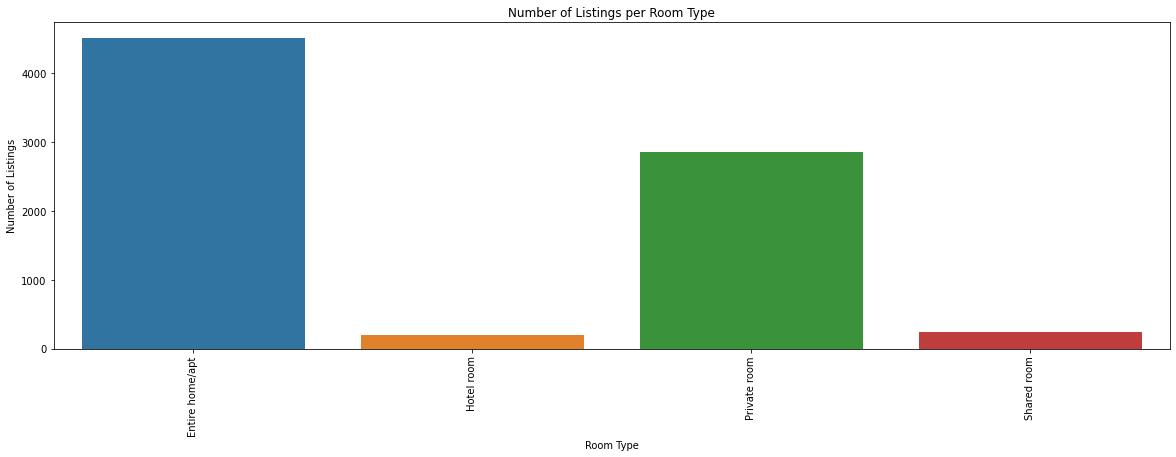

In [68]:
plt.figure(figsize=(20, 6))
sns.barplot(room_type_count_df.index, room_type_count_df["room_id"])
plt.title("Number of Listings per Room Type")
plt.xticks(rotation=90)
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")

plt.show()

In [69]:
airbnb_db_df["host_is_superhost"].value_counts()

f    4509
t    3306
Name: host_is_superhost, dtype: int64

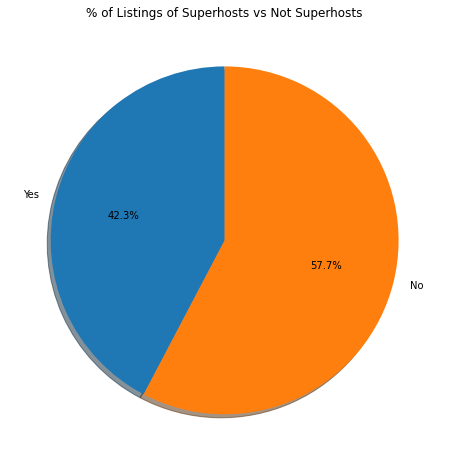

In [70]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Yes", "No"
sizes = [3306, 4510]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("% of Listings of Superhosts vs Not Superhosts")
plt.show()

In [51]:
# create copy of dataframe for EDA, making room_id the index
#airbnb_EDA_df = airbnb_db_df.copy()
#airbnb_EDA_df.set_index("room_id", inplace=True)

In [52]:
airbnb_EDA_df.head()

,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total
room_id,,,,,,,,,,,,,,,,,,
958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,30,37.76931,-122.43386,217,97.0,170.0,100.0,270.0
3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,5,37.75402,-122.45805,160,94.0,99.0,10.0,109.0
5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,60,37.74511,-122.42102,111,98.0,235.0,100.0,335.0
7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,60,37.76669,-122.45250,18,86.0,65.0,50.0,115.0
8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,90,37.76487,-122.45183,8,93.0,65.0,50.0,115.0


In [54]:
airbnb_EDA_df.describe()

,host_id,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total
count,7.815000e+03,7815.000000,7815.000000,7815.00000,7.815000e+03,7.815000e+03,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000
mean,6.123837e+07,3.151504,1.343186,1.39341,1.281193e+04,1.329533e+04,37.765912,-122.430345,46.429047,76.934357,226.942035,91.000768,317.942802
std,8.074310e+07,1.901753,0.921654,0.92796,1.131190e+06,1.131185e+06,0.022754,0.027061,79.106917,38.338782,419.615533,81.985238,439.199970
min,2.800000e+01,1.000000,0.000000,0.00000,1.000000e+00,1.000000e+00,37.708160,-122.513060,0.000000,0.000000,0.000000,0.000000,10.000000
25%,4.202870e+06,2.000000,1.000000,1.00000,2.000000e+00,2.800000e+01,37.751255,-122.442980,1.000000,86.000000,99.000000,30.000000,150.000000
50%,2.020837e+07,2.000000,1.000000,1.00000,4.000000e+00,1.500000e+02,37.768690,-122.424870,12.000000,96.000000,150.000000,79.000000,235.000000
75%,1.003905e+08,4.000000,2.000000,1.50000,3.000000e+01,1.125000e+03,37.785375,-122.410660,56.000000,99.000000,245.000000,125.000000,364.000000
max,3.016759e+08,16.000000,14.000000,14.00000,1.000000e+08,1.000000e+08,37.828790,-122.368570,757.000000,100.000000,10000.000000,688.000000,10079.000000


In [55]:
airbnb_EDA_df["total"].describe()

count     7815.000000
mean       317.942802
std        439.199970
min         10.000000
25%        150.000000
50%        235.000000
75%        364.000000
max      10079.000000
Name: total, dtype: float64

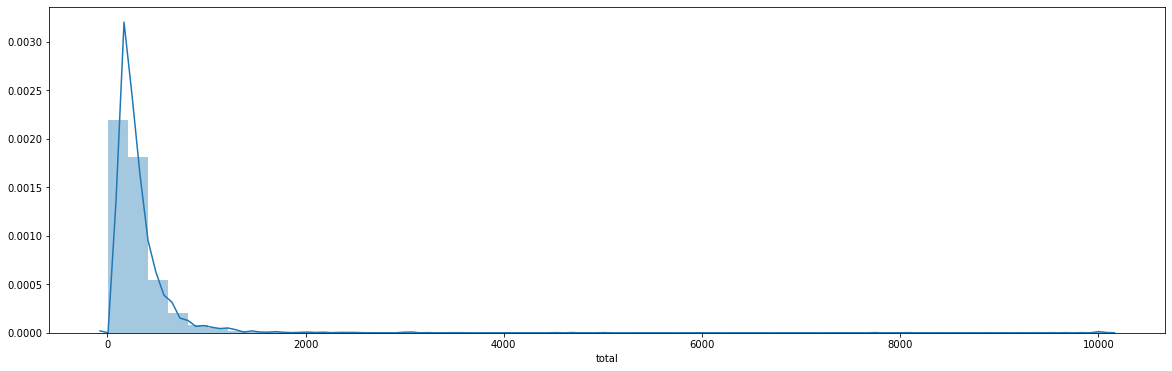

In [57]:
# inspect prices (total)
plt.figure(figsize=(20,6))
sns.distplot(airbnb_EDA_df["total"])
plt.show()

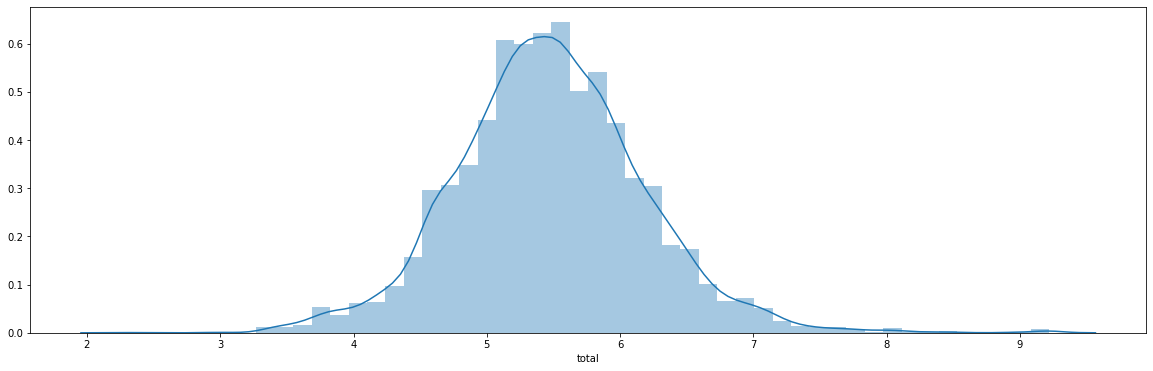

In [58]:
# inspect prices
plt.figure(figsize=(20,6))
sns.distplot(airbnb_EDA_df["total"].map(np.log))

### How does each feature affect total price (price + cleaning_fee)?

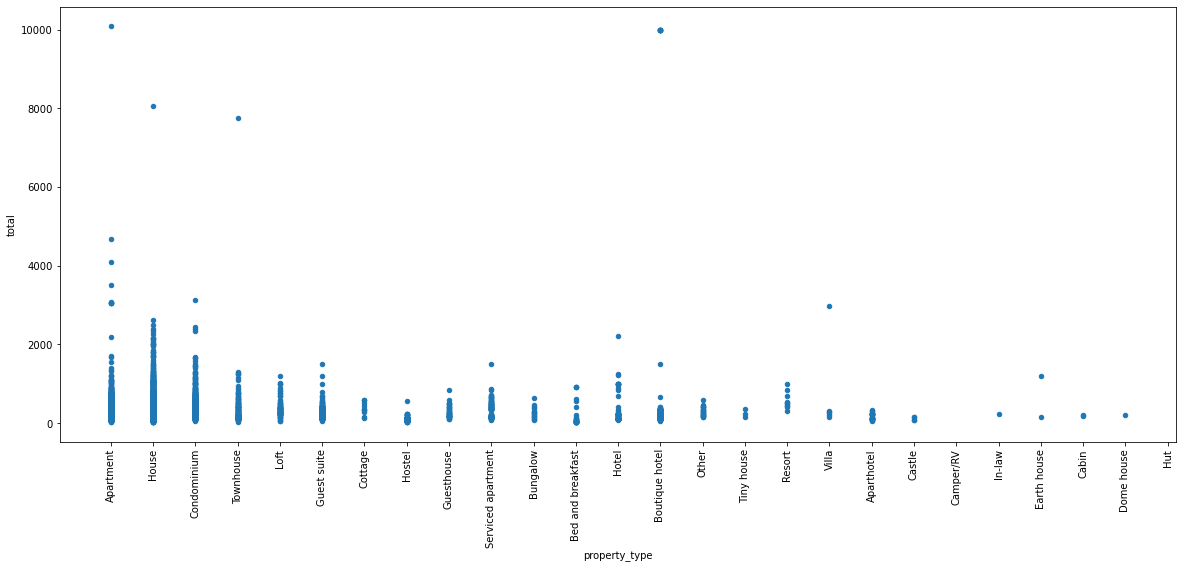

In [60]:
# price vs property_type
airbnb_EDA_df.plot.scatter(x="property_type", y="total", rot=90, figsize=(20,8))

C:\Users\annab\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


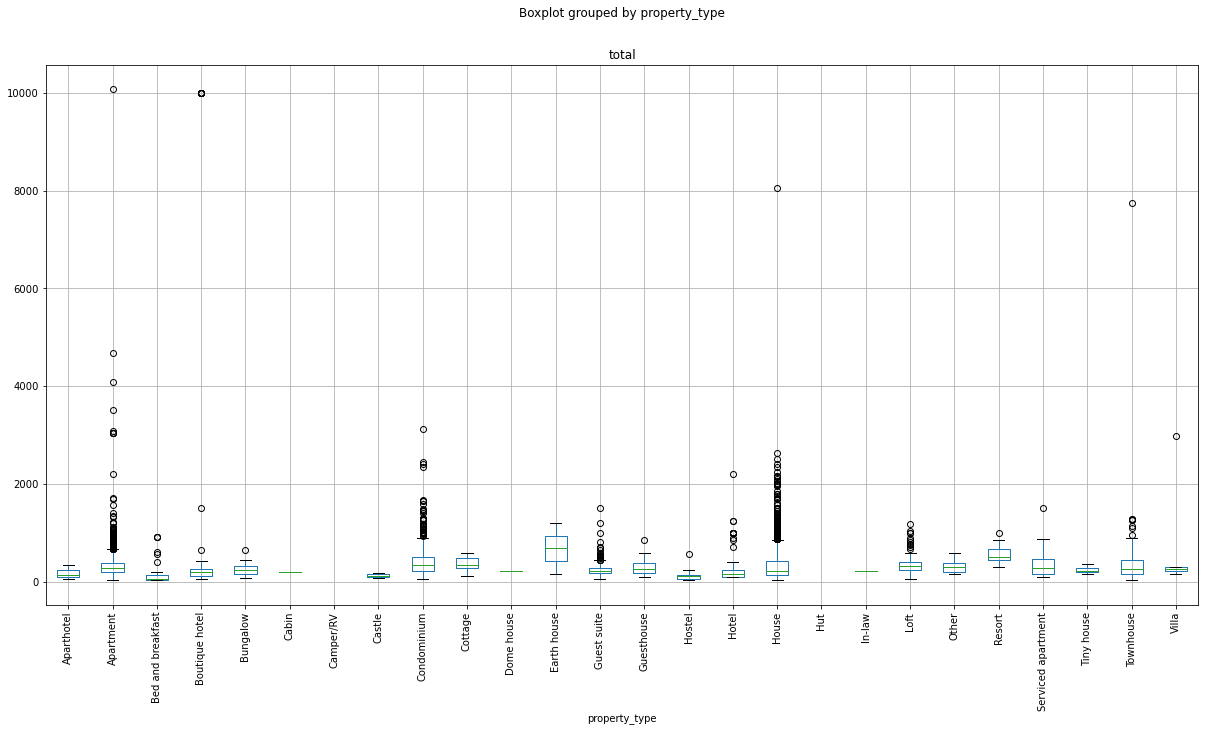

In [61]:
airbnb_EDA_df.boxplot(column="total", by="property_type", figsize=(20,10), rot=90)

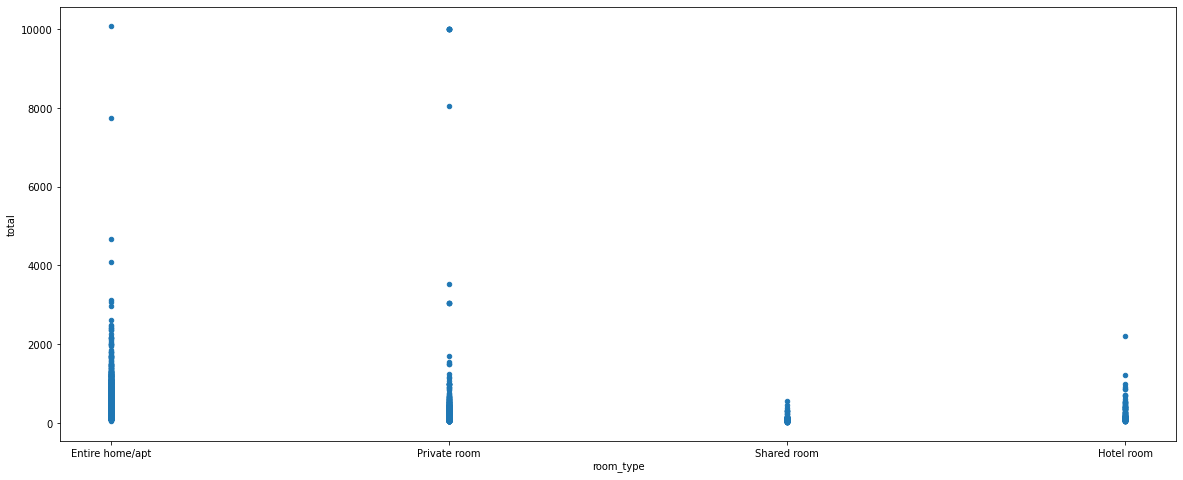

In [50]:
# price vs room_type
airbnb_EDA_df.plot.scatter(x="room_type", y="total", figsize=(20,8))

C:\Users\annab\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


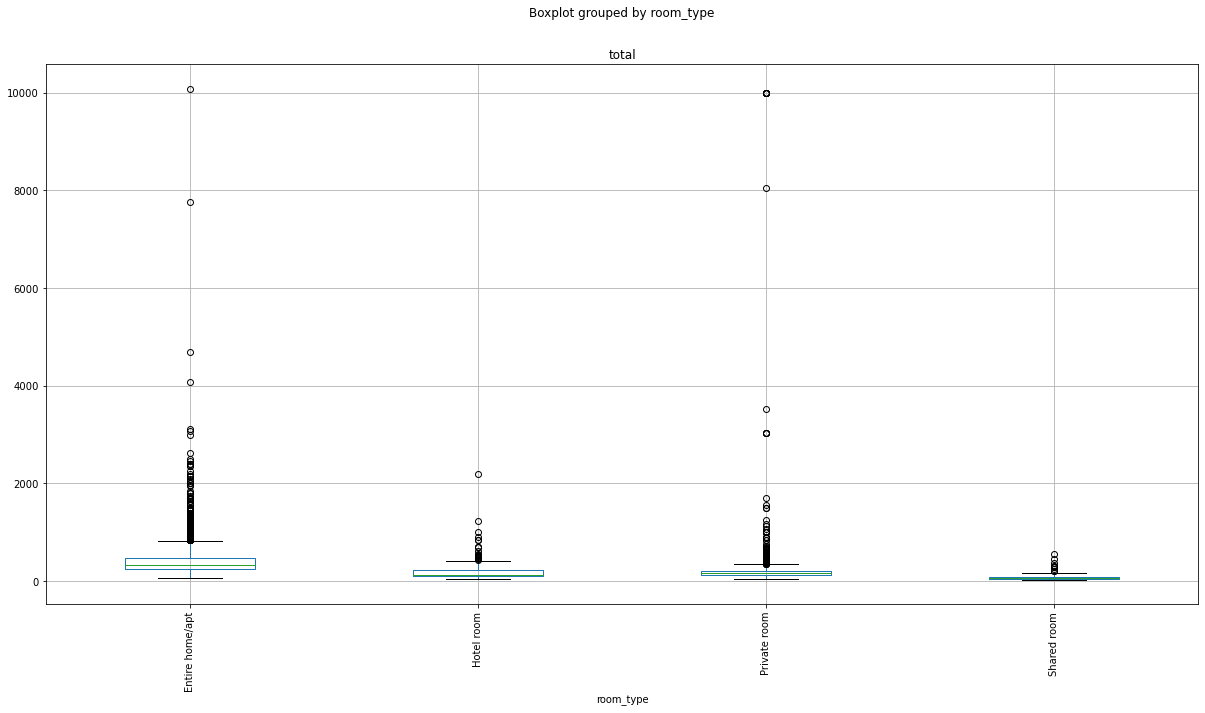

In [51]:
airbnb_EDA_df.boxplot(column="total", by="room_type", figsize=(20,10), rot=90)

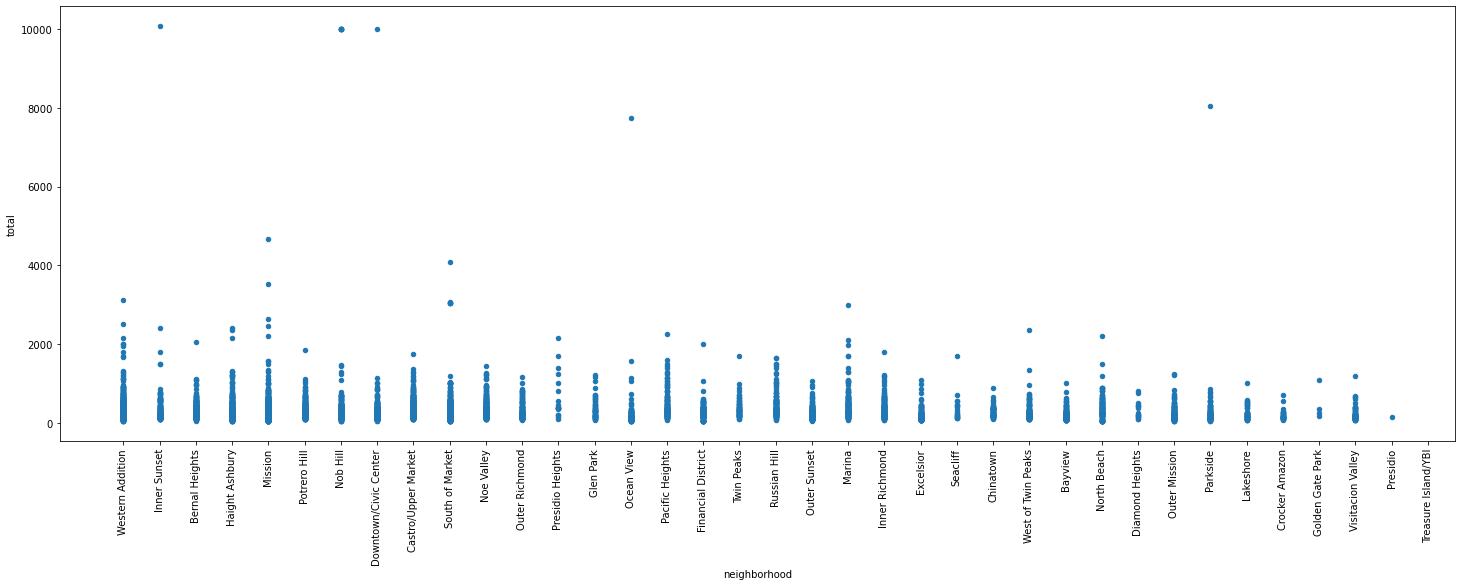

In [52]:
# price vs neighborhood
airbnb_EDA_df.plot.scatter(x="neighborhood", y="total", figsize=(25,8), rot=90)

C:\Users\annab\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


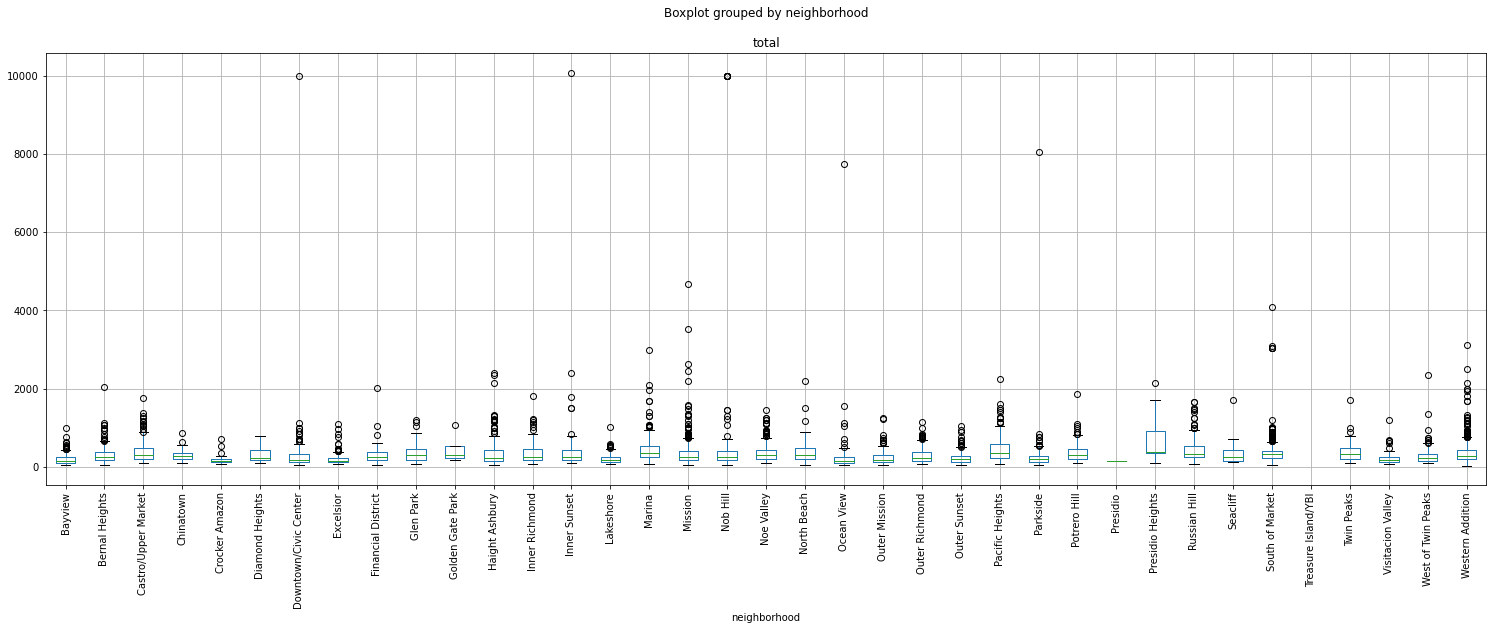

In [53]:
airbnb_EDA_df.boxplot(column="total", by="neighborhood", figsize=(25,8), rot=90);

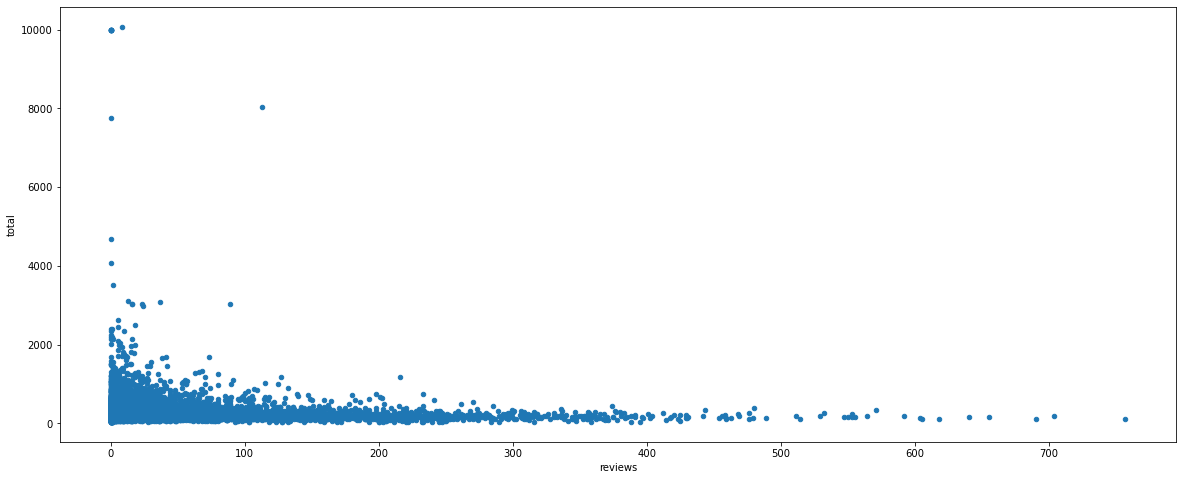

In [54]:
# price vs reviews
#plt.scatter(airbnb_EDA_df.reviews, airbnb_EDA_df.price)
airbnb_EDA_df.plot.scatter(x="reviews", y="total", figsize=(20,8))

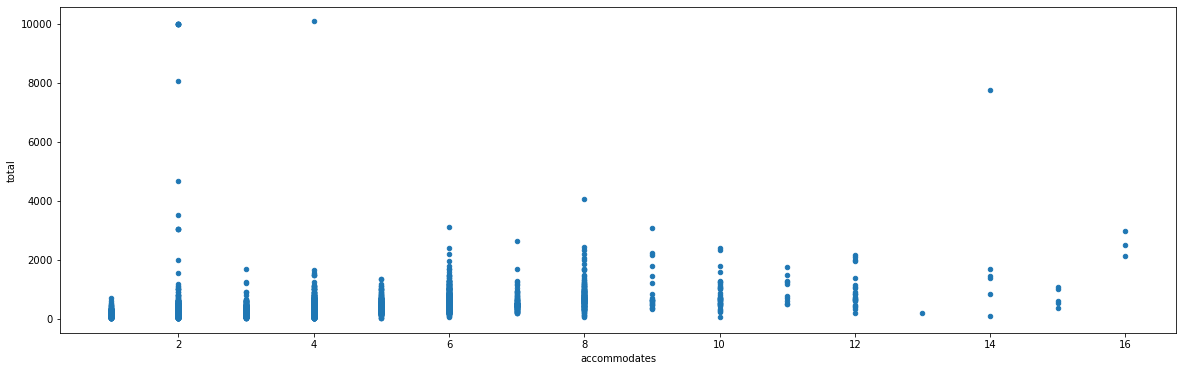

In [56]:
# price vs accomodates (number of people)
airbnb_EDA_df.plot.scatter(x="accommodates", y="total", figsize=(20,6))

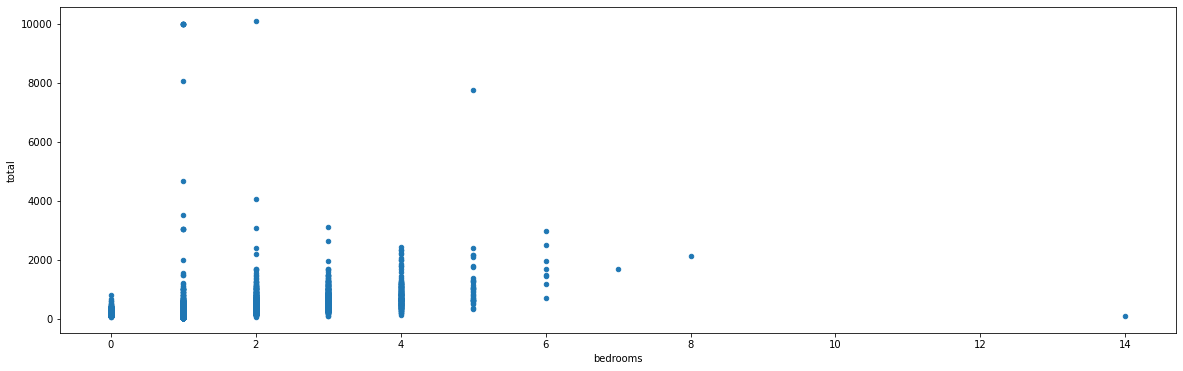

In [57]:
# price vs bedrooms (number of bedrooms)
airbnb_EDA_df.plot.scatter(x="bedrooms", y="total", figsize=(20,6))

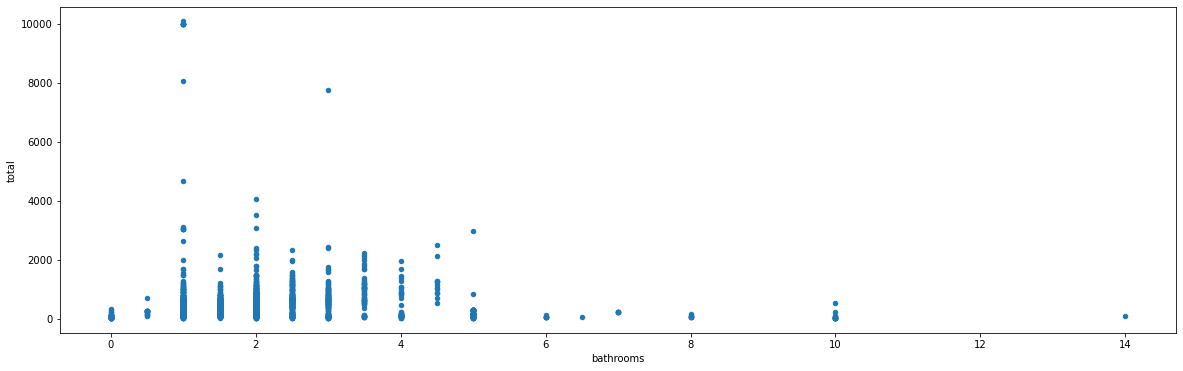

In [58]:
# price vs bathrooms (number of bathrooms)
airbnb_EDA_df.plot.scatter(x="bathrooms", y="total", figsize=(20,6))